## 1. Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#make plot show nicely in notebook
%matplotlib inline

df = pd.read_csv("../../data/wedding_cost_dataset_v3.csv")
df.head() #display few rows

,guest_count,wedding_type,decor_level,flower_package_level,photographer_hours,videographer,catering_style,menu_type,season,wedding_day,dress_budget,travel_required,room_block_count,entertainment_type,makeup_hair_package,coordinator_package,total_cost_usd
0,126,resort,3,3,10,0,plated,luxury,winter,weekend,4308,0,3,dj,2,none,86157.51
1,6,civil,1,2,10,0,plated,standard,summer,weekday,3498,0,12,dj,2,none,8766.37
2,94,local,2,1,2,1,buffet,luxury,summer,weekend,5674,0,22,none,1,basic,42080.94
3,119,backyard,1,3,4,1,buffet,standard,summer,weekend,5090,1,7,dj,3,none,32955.75
4,201,backyard,1,2,9,1,plated,standard,fall,weekday,2824,1,17,dj,3,basic,30810.47


In [ ]:
## 2. Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guest_count           300 non-null    int64  
 1   wedding_type          300 non-null    object 
 2   decor_level           300 non-null    int64  
 3   flower_package_level  300 non-null    int64  
 4   photographer_hours    300 non-null    int64  
 5   videographer          300 non-null    int64  
 6   catering_style        300 non-null    object 
 7   menu_type             300 non-null    object 
 8   season                300 non-null    object 
 9   wedding_day           300 non-null    object 
 10  dress_budget          300 non-null    int64  
 11  travel_required       300 non-null    int64  
 12  room_block_count      300 non-null    int64  
 13  entertainment_type    300 non-null    object 
 14  makeup_hair_package   300 non-null    int64  
 15  coordinator_package   3

In [8]:
df.describe(include="all")

,guest_count,wedding_type,decor_level,flower_package_level,photographer_hours,videographer,catering_style,menu_type,season,wedding_day,dress_budget,travel_required,room_block_count,entertainment_type,makeup_hair_package,coordinator_package,total_cost_usd
count,300.000000,300,300.000000,300.000000,300.000000,300.000000,300,300,300,300,300.000000,300.000000,300.000000,300,300.000000,300,300.000000
unique,NaN,6,NaN,NaN,NaN,NaN,3,3,4,2,NaN,NaN,NaN,3,NaN,3,NaN
top,NaN,destination,NaN,NaN,NaN,NaN,plated,standard,summer,weekend,NaN,NaN,NaN,dj,NaN,none,NaN
freq,NaN,57,NaN,NaN,NaN,NaN,115,109,81,153,NaN,NaN,NaN,112,NaN,107,NaN
mean,85.276667,NaN,2.956667,2.950000,5.916667,0.470000,NaN,NaN,NaN,NaN,3270.130000,0.480000,12.293333,NaN,2.006667,NaN,41378.993400
std,75.359074,NaN,1.435849,1.421585,2.626668,0.499933,NaN,NaN,NaN,NaN,1609.357274,0.500435,7.130458,NaN,0.809613,NaN,31161.072334
min,2.000000,NaN,1.000000,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,306.000000,0.000000,0.000000,NaN,1.000000,NaN,3120.050000
25%,6.000000,NaN,2.000000,2.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,1933.250000,0.000000,6.750000,NaN,1.000000,NaN,14281.285000
50%,72.500000,NaN,3.000000,3.000000,6.000000,0.000000,NaN,NaN,NaN,NaN,3383.000000,0.000000,12.000000,NaN,2.000000,NaN,35178.285000
75%,149.000000,NaN,4.000000,4.000000,8.000000,1.000000,NaN,NaN,NaN,NaN,4658.500000,1.000000,18.250000,NaN,3.000000,NaN,63157.502500


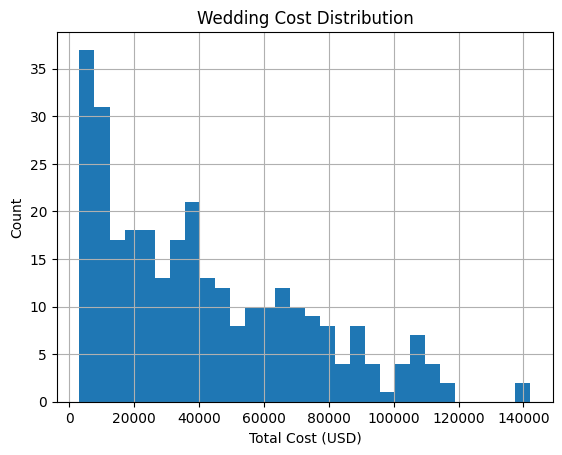

In [9]:
#distribution of total cost
df["total_cost_usd"].hist(bins=30) #plot column as histogram, group value into bins/or divide the range of values into 30 buckets
plt.xlabel("Total Cost (USD)")
plt.ylabel("Count")
plt.title("Wedding Cost Distribution")
plt.show()

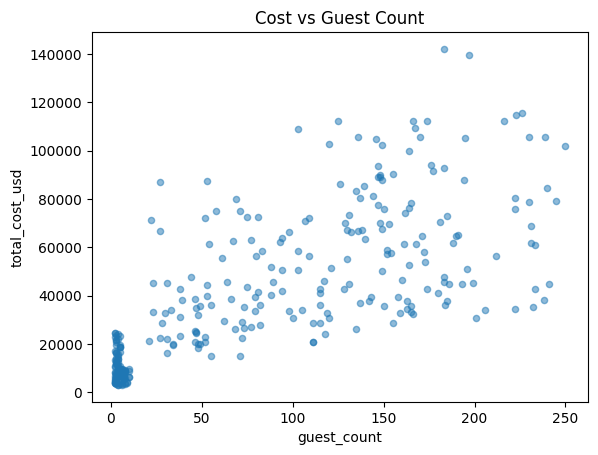

In [10]:
#Cost vs guest count
df.plot.scatter(x="guest_count", y="total_cost_usd", alpha=0.5)
plt.title("Cost vs Guest Count")
plt.show()

## 3. Prepare Features

In [11]:
#Features for first regression
features = ["guest_count", "decor_level", "flower_package_level",
            "photographer_hours", "dress_budget"]

X = df[features].values
y = df["total_cost_usd"].values.reshape(-1,1)

X[:5], y[:5]

(array([[ 126,    3,    3,   10, 4308],
        [   6,    1,    2,   10, 3498],
        [  94,    2,    1,    2, 5674],
        [ 119,    1,    3,    4, 5090],
        [ 201,    1,    2,    9, 2824]]),
 array([[86157.51],
        [ 8766.37],
        [42080.94],
        [32955.75],
        [30810.47]]))

## 4. Scale Features

Train/Test Split + Scaling https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [12]:
#Train/Test Split + Scaling https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization (very important for gradient descent)
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

X_train_scaled.shape, X_test_scaled.shape


((240, 5), (60, 5))

## 5. Train Linear Regression (Gradient Descent from Scratch)

total_cost ≈
W1 * guest_count +
W2 * decor_level +
W3 * flower_level +
W4 * photographer_hours +
W5 * dress_budget +
b

Start with W=[0, 0, 0, 0, 0]
During W -= alpha * dW
and 1000 iterations, W slowly changes to meaningful values

X_train_scaled: (240, 5)
W: (5, 1)
b: <class 'float'>
y_train: (240, 1)
Learned weights (W):
[[22075.102576  ]
 [  823.0685074 ]
 [ 1972.80076864]
 [ 1253.86485175]
 [  761.80521278]]

Learned bias (b):
42506.19133380615


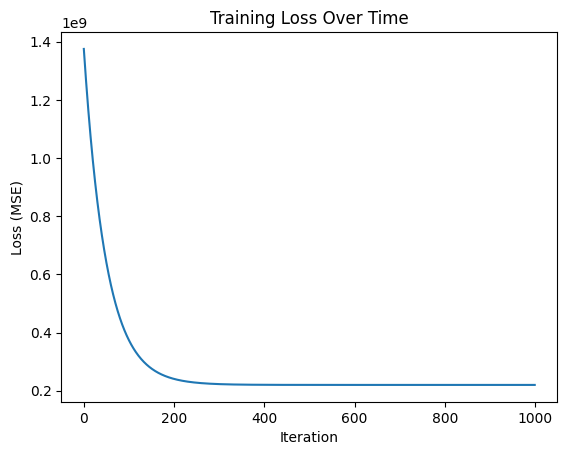

In [14]:
m, n = X_train_scaled.shape  # how many rows (m) and columns/features (n)

# initialize parameters
W = np.zeros((n, 1))  # weights: (5,1)  5x1->1 weight per feature;#ie. each additional guest increases cost by 100 dollars , each hour increases photography by 200 dollars
b = 0.0               # bias/ base cost

alpha = 0.01  # learning rate
num_iters = 1000
losses = []

print("X_train_scaled:", X_train_scaled.shape)
print("W:", W.shape)
print("b:", type(b))
print("y_train:", y_train.shape)

for i in range(num_iters):
    # Forward pass: compute predictions
    y_pred = X_train_scaled @ W + b  # (m,1) multiply each feature by its weight and add them up = predicted cost of wedding
    error = y_pred - y_train         # (m,1)y_pred= 1 predicted cost per wedding , error = how far are we off
  
    # Mean squared error cost/compute how bad we are
    loss = (1 / (2 * m)) * np.sum(error ** 2) 
    losses.append(loss) #smaller the better

    # Compute gradients : how to change weights and bias
    dW = (1 / m) * (X_train_scaled.T @ error)  # (5,1) for each weight Wi, how should I tweak it to reduce error?
    db = (1 / m) * np.sum(error)               # scalar how should I tweak the base offset b to reduce error?

    # Parameter update/ update w and be a tiny bit alpha = how big a step we take
    W -= alpha * dW #learned weights, model's udnerstanding of importance)
    b -= alpha * db  


print("Learned weights (W):")
print(W)

print("\nLearned bias (b):")
print(b)

# plot loss curve
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Time")
plt.show()


## 6. Unscale and Interpret Weights

In [ ]:
#currently scaled, we are unscaling   
true_w = W.flatten() / X_std.flatten()
true_b = b - np.sum((W.flatten() * X_mean.flatten()) / X_std.flatten())

for name, w in zip(features, true_w):
        print(f"{name}: {w:.2f} dollars per unit")


guest_count: 291.08 dollars per unit
decor_level: 570.72 dollars per unit
flower_package_level: 1373.43 dollars per unit
photographer_hours: 478.55 dollars per unit
dress_budget: 0.49 dollars per unit


## 7. Evaluate on Test Set

In [19]:
y_test_pred = X_test_scaled @ W + b

mae = np.mean(np.abs(y_test_pred - y_test))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 14913.660982435273
